# 統計力学の授業でやったやつ


## stirlingの公式
統計力学でよく出てくるのは
$$\log (n!) \propto n(\log n  - 1) $$
のかたち．

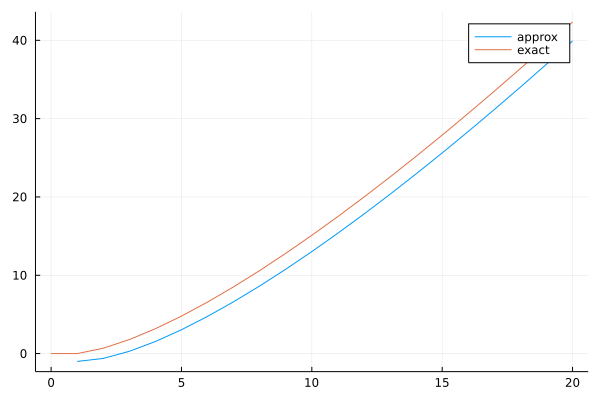

In [12]:
using Plots

N = 20
n = 0:N

approx = n .* (log.(n).-1)

exact = []
for i ∈ n
    f = log(factorial(i))
    append!(exact, f)
end

plot(n, approx, label="approx")
plot!(n, exact, label="exact")

もう少しちゃんと書くと，
$$(n!\sim)\ \Gamma(x+1)=\sqrt{2\pi n}(n/e)^n$$

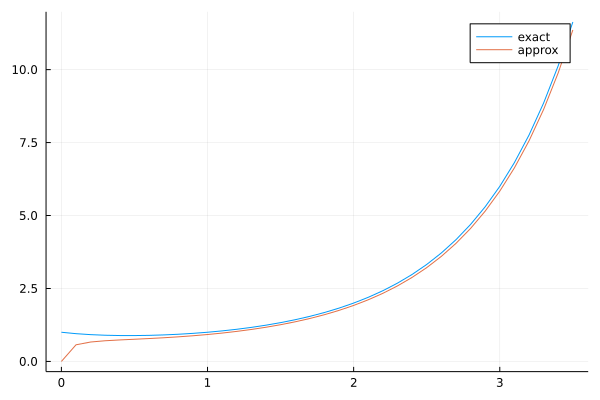

In [22]:
using Plots
using SpecialFunctions

x = 0:0.1:3.5
exact = gamma.(x.+1)

approx = sqrt.(2 .* π .* x) .* (x ./ ℯ).^x

plot(x, exact, label="exact")
plot!(x, approx, label="approx")

## 各粒子が1/2の確率でどちらかに存在し，$N$粒子中$n$粒子が片方に存在する確率

授業でやってたやつ．
$$
    \log P 
    =\log \left(\frac{N!}{(N-n)!n!}(1/2)^{N} \right)
    \sim-N \left(\log 2 + \frac{n}{N}\log\frac{n}{N}+\frac{N-n}{N}\log\frac{N-n}{N}\right)
$$

Any[1.9073486328125e-5, 0.0001811981201171875, 0.001087188720703125, 0.004620552062988281, 0.0147857666015625, 0.03696441650390625, 0.0739288330078125, 0.12013435363769531, 0.16017913818359375, 0.17619705200195312, 0.16017913818359375, 0.12013435363769531, 0.0739288330078125, 0.03696441650390625, 0.0147857666015625, 0.004620552062988281, 0.001087188720703125, 0.0001811981201171875, 1.9073486328125e-5]


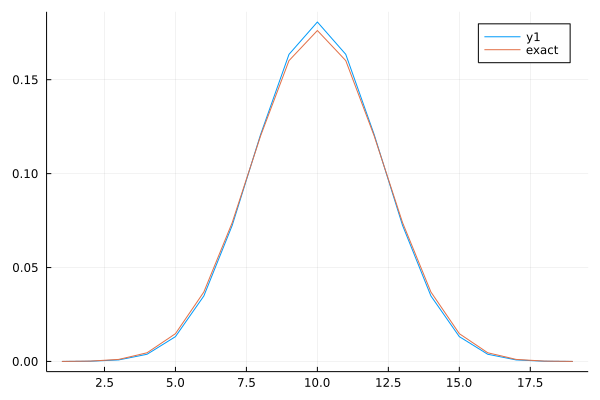

In [2]:
using Plots

N = 20
n = 1:N-1

P = -N .* (log(2) .+ n./N .* log.(n./N) .+ (N.-n) ./N .* log.( (N.-n)./N))

norm = sum(ℯ.^P)
plot(n, ℯ.^P/norm)

exact = []
for i ∈ n
    pn = factorial(N)/(factorial(N-i) * factorial(i)) * 0.5^N
    append!(exact, pn)
end

println(exact)
plot!(n, exact, label="exact")

$x = n/N -1/2$でみやすく．


In [12]:
using Plots

N = 20
x = 1:N
prob = ℯ.^(-N .* (log.(2) .+ (x.+1/2) .* log.(x .+ 1/2) .+ (1/2 .- x) .* log.(1/2 .-x)))

plot(x, prob)

LoadError: DomainError with -0.5:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).